**STEP 4 - EXPLORING THE DATA**

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64
Explained Variance Ratio: 

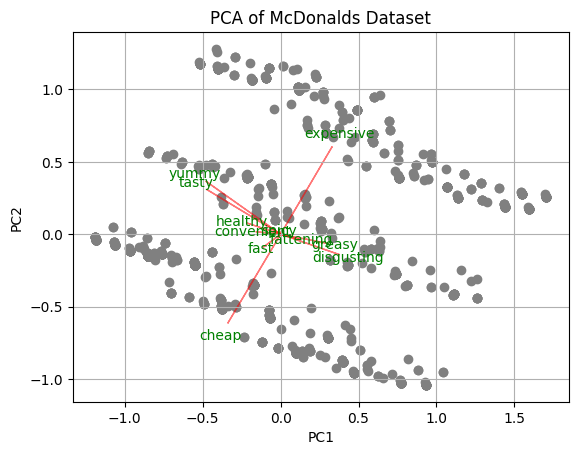

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer

# Loading the dataset
file_path = '/content/drive/MyDrive/Code Conversion/mcdonalds.csv'
mcdonalds = pd.read_csv(file_path)

# Displaying the column names and the dimensions of the dataset
print(mcdonalds.columns)
print(mcdonalds.shape)

# Displaying the first 3 rows of the dataset
print(mcdonalds.head(3))

# Converting the first 11 columns to a binary matrix
MD_x = mcdonalds.iloc[:, 0:11]
MD_x_binary = (MD_x == "Yes").astype(int)

# Calculating means
column_means = MD_x_binary.mean(axis=0).round(2)
print(column_means)

# Performing Principal Component Analysis PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x_binary)

# Summary of PCA
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))

# Ploting the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonalds Dataset')

# Add projection axes (Optional: similar to projAxes in R)
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1, comp2, color='r', alpha=0.5)
    plt.text(comp1 * 1.15, comp2 * 1.15, MD_x.columns[i], color='g', ha='center', va='center')

plt.grid()
plt.show()
